In [1]:
!pip install sklearn

(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


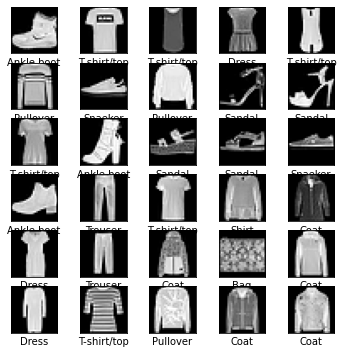

In [2]:
# fashion_mnist
# 데이터 축출을 하는데
# COM20, MaxPool20, Flatten, Sense

import tensorflow as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data


(x_train, t_train), (x_test, t_test) = load_data()
print(x_train.shape, t_train.shape)
print(x_test.shape, t_train.shape)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Snaeker', 'Bag', 'Ankle boot']
sample_size = 30
random_idx = np.random.randint(60000, size = sample_size)
plt.figure(figsize = (6, 6))
for i, idx in enumerate(random_idx):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[t_train[i]])
plt.show()

In [3]:
from tensorflow.keras.utils import to_categorical
x_train = x_train / 255
x_test = x_test / 255

t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size = 0.3, random_state = 777)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model1 = Sequential()
model1.add(Flatten(input_shape = (28, 28)))
# model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])
model1.history = model1.fit(x_train, t_train,
                           batch_size = 64,
                           epochs = 10,
                           validation_data = (x_val, t_val))


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 25us/sample - loss: 0.5873 - acc: 0.7987 - val_loss: 0.4366 - val_acc: 0.8481
Epoch 2/10
42000/42000 [==============================] - 1s 19us/sample - loss: 0.4220 - acc: 0.8511 - val_loss: 0.3947 - val_acc: 0.8602
Epoch 3/10
42000/42000 [==============================] - 1s 18us/sample - loss: 0.3837 - acc: 0.8616 - val_loss: 0.3727 - val_acc: 0.8681
Epoch 4/10
42000/42000 [==============================] - 1s 18us/sample - loss: 0.3528 - acc: 0.8701 - val_loss: 0.3678 - val_acc: 0.8695
Epoch 5/10
42000/42000 [==============================] - 1s 18us/sample - loss: 0.3337 - acc: 0.8776 - val_loss: 0.3453 - val_acc: 0.8762
Epoch 6/10
42000/42000 [==============================] - 1s 18us/sample - loss: 0.3196 - acc: 0.8814 - val_loss: 0.3350 - val_acc: 0.8820
Epoch 7/10
42000/42000 [==============================] - 1s 18us/sample - loss: 0.3081 - acc: 0.8867 - val_loss: 0.

In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()
print(x_train.shape, t_train.shape)
print(x_test.shape, t_train.shape)
np.random.seed(777) # 섞어 주는 거


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Snaeker', 'Bag', 'Ankle boot']
sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)


x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                 test_size = 0.3,
                                                 random_state = 777) # rnadom_state : 섞어 주는 거

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential([
    Conv2D(filters=16, kernel_size = 3, padding='same',
          activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['acc'])
model.fit(x_train, t_train, epochs = 30, batch_size = 128, validation_data = (x_val, t_val))

(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 12s 278us/sample - loss: 0.6610 - acc: 0.7631 - val_loss: 0.4633 - val_acc: 0.8297
Epoch 2/30
42000/42000 [==============================] - 11s 264us/sample - loss: 0.3918 - acc: 0.8588 - val_loss: 0.3539 - val_acc: 0.8728
Epoch 3/30
42000/42000 [==============================] - 11s 262us/sample - loss: 0.3379 - acc: 0.8771 - val_loss: 0.3161 - val_acc: 0.8899
Epoch 4/30
42000/42000 [==============================] - 11s 259us/sample - loss: 0.3054 - acc: 0.8896 - val_loss: 0.2936 - val_acc: 0.8963
Epoch 5/30
42000/42000 [==============================] - 11s 261us/sample - loss: 0.2849 - acc: 0.8970 - val_loss: 0.2878 - val_acc: 0.8999
Epoch 6/30
42000/42000 [==============================] - 11s 260us/sample - loss: 0.2663 - acc: 0.9027 - val_loss: 0.2746 - val_acc: 0.9024
Epoch 7/30
42000/42000 [==============================

In [12]:
!pip install opencv-python

output의 크기 : 25


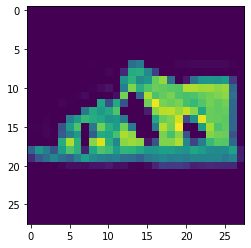

In [18]:
import cv2

plt.imshow(x_train[0])

horizontal_filter = np.array([[1., 2., 1.],
                            [0., 0., 0.],
                            [-1., -2., -1.]])

vertical_filter = np.array([[-1., 0., -1],
                          [2., 0., 2.],
                          [1., 0., -1.]])

test_image = cv2.resize(x_train[0], (27, 27))
image_size = test_image.shape[0]
output_size = int((image_size - 3) / 1 + 1)
print('output의 크기 : %d'%output_size)

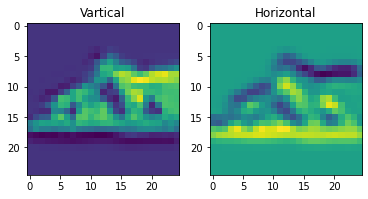

In [29]:
filter_size = 3
def get_filtered_image(filters):
    filtered_image = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            # 컨볼루션 연산
            indice_image = test_image[i:(i + filter_size),
                                     j:(j + filter_size)] * filters
            indice_sum = np.sum(indice_image)
            if(indice_sum > 255):
                indice_sum= 255
            filtered_image[i, j] = indice_sum
            
    return filtered_image
    
vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1, 2, 1)
plt.title('Vartical')
plt.imshow(vertical_filtered_image)

plt.subplot(1, 2, 2)
plt.title('Horizontal')
plt.imshow(horizontal_filtered_image)
plt.show()

sobel_image = np.sqrt(np.square(horizontal_filtered_image) +
                      np.square(vertical_filtered_image))

In [ ]:
'''
1) Deconvolutional Networks - 2010

2) Adaptive Deconvolutional Networks for Mid and High Level Feature Learning - 2011

3) Visualizing and Understanding Convolutional Networks - 2013

모두 뉴욕대의 Matthew D. Zeiler가 대학원시절에 쓴 논문들이며 이 중에서도 
특히 3번 논문이 ImageNet classification에서 우승한 네트워크에 대해 다뤄서 아주 유명하다.
'''